In [1]:
## Megha Shakya (Section A)

DS 256 Data Science Programming, Fall 2024

Prof Eatai Roth

## Problem Set 5
Due 11/14/2024 by 8p

## Titanic Pandas
(sounds cute...is not)

In this assignment, we'll explore the titanic training data set. These data represent a portion of the passenger manifest of the Titanic, detailing the passengers and whether or not they survived the fateful crash.

The columns are mostly self-explanatory. Key to less-obvious columns:
 - Sex - male=1 / female=0 
 - Parch - number of parents/children traveling with
 - SibSp - numbers of siblings/spouses traveling with
 - PClass - ticket class (like first class, business, economy)


 To start, you should import packages, ```pandas``` (as pd) and ```matplotlib.pyplot``` (as plt). Then load the data from ```titanic_train_clean.csv``` into a pandas dataframe.

 Feel free to add more code blocks if needed. When making figures, don't forget to label axes and provide titles and legends when appropriate.

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
tt_df = pd.read_csv("/Users/meghashakya/Documents/DataScience256/Assignments/ps05-MeghaShakya/titanic.csv")
tt_df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family_Size
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,0,A/5 21171,Mr,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,1,PC 17599,Mrs,1
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,0,1,STON/O2. 3101282,Miss,0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,1,113803,Mrs,1
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,0,373450,Mr,0


## Homework Problems

For each of the problems, you'll write some code to find the answer. If there is a written/short answer component, use the provided text field.

### Problem 1

 - How many passengers are recorded in this log?
 - What percentage are male?
 - What percentage survived?

Hint: You can find these three answers with a single command.

In [2]:
tt_df.describe()

,Age,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Family_Size
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,29.445196,32.204208,0.381594,446.000000,2.308642,0.647587,0.523008,0.383838,0.904602
std,13.244896,49.693429,0.806057,257.353842,0.836071,0.477990,1.102743,0.486592,1.613459
min,0.420000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,7.910400,0.000000,223.500000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,30.000000,14.454200,0.000000,446.000000,3.000000,1.000000,0.000000,0.000000,0.000000
75%,35.500000,31.000000,0.000000,668.500000,3.000000,1.000000,1.000000,1.000000,1.000000
max,80.000000,512.329200,6.000000,891.000000,3.000000,1.000000,8.000000,1.000000,10.000000


Your written answer:

 - 891
 - 64.8%
 - 38.4%

### Problem 2:

 - What percentage of female passengers survived?
 - What percentage of male passengers survived?

In [3]:
#Percentage of female survived
femSurv = len(tt_df .query('Sex== 0 and Survived== 1'))/len(tt_df .query('Sex== 0'))
femSurv

0.7420382165605095

In [4]:

#Percentage of male survived
maleSurv = len(tt_df .query('Sex== 1 and Survived== 1'))/len(tt_df .query('Sex== 1'))
maleSurv

0.18890814558058924

Your written answer:

 - 74.2%
 - 18.9%

### Problem 3

Use ```groupby``` and ```agg``` to find the percentage of the total tickets and the survivorship percentage for each class of ticket.

In [5]:
tt_df['Pclass'].unique()

array([3, 1, 2])

In [6]:
#Class 1
class_df = tt_df.groupby(['Pclass']).agg({'Age':'count', 'Survived':lambda x: (x == 1).sum()})
class_df

,Age,Survived
Pclass,,
1,216,136
2,184,87
3,491,119


In [7]:
#for ticket percentage
tick_perc = tt_df.groupby(['Pclass']).agg({'Pclass': 'count'})/ 891
tick_perc


,Pclass
Pclass,
1,0.242424
2,0.206510
3,0.551066


In [8]:
#for survivorship percentage
class_df['survivorship_percentage']  = class_df['Survived']/class_df['Age']
class_df

,Age,Survived,survivorship_percentage
Pclass,,,
1,216,136,0.629630
2,184,87,0.472826
3,491,119,0.242363


Your written answer:

 - Class 1 
    - 24.2%
    - 62.96% 
- Class 2 
    - 20.1%
    - 47.3% 
- Class 3
    - 55.1%
    - 24.2%


### Problem 4

Create two new dataframes corresponding to survivors and non-survivors keeping only the columns: age, name, and sex. Display the first five rows of these new dataframes.

Create a figure showing the distribution of age by sex and survivorship (four histograms on the same axes: male-survivors, female-survivors, male-unlucky, female-unlucky). Choose colors and histtype (see the [documentation for histogram](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)) to make this figure easy to read and interpret.

In [9]:
# Survivors Dataframe
Survivors_df = tt_df[tt_df['Survived'] == 1][['Age', 'Name', 'Sex']]
Survivors_df.head()


,Age,Name,Sex
1,38.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0
2,26.0,"Heikkinen, Miss. Laina",0
3,35.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0
8,27.0,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0
9,14.0,"Nasser, Mrs. Nicholas (Adele Achem)",0


In [10]:
# Non-survivors Dataframe
Non_Survivors_df = tt_df[tt_df['Survived'] == 0][['Age', 'Name', 'Sex']]
Non_Survivors_df.head()

,Age,Name,Sex
0,22.0,"Braund, Mr. Owen Harris",1
4,35.0,"Allen, Mr. William Henry",1
5,30.0,"Moran, Mr. James",1
6,54.0,"McCarthy, Mr. Timothy J",1
7,2.0,"Palsson, Master. Gosta Leonard",1


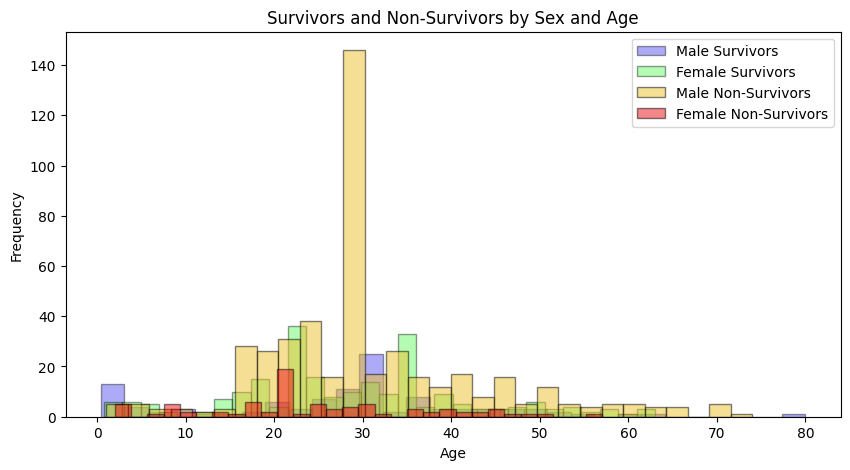

In [11]:
# Histogram 

male_survivors = Survivors_df[Survivors_df['Sex'] == 1]['Age']
male_nonsurvivors = Non_Survivors_df[Non_Survivors_df['Sex'] == 1]['Age']
female_survivors = Survivors_df[Survivors_df['Sex'] == 0]['Age']
female_nonsurvivors = Non_Survivors_df[Non_Survivors_df['Sex'] == 0]['Age']

plt.figure(figsize=(10, 5))
# Histogram for male survivors
plt.hist(male_survivors, label='Male Survivors', alpha=0.4, bins=30, edgecolor='black', color = '#332ded')

# Histogram for female survivors
plt.hist(female_survivors, label='Female Survivors', alpha=0.4, bins=30, edgecolor='black',color = '#45f542')

# Histogram for male non-survivors
plt.hist(male_nonsurvivors, label='Male Non-Survivors', alpha=0.5, bins=30, edgecolor='black', color = '#edc02d')

# Histogram for female non-survivors
plt.hist(female_nonsurvivors, label='Female Non-Survivors', alpha=0.5, bins=30, edgecolor='black', color = '#eb0c13')

# Add titles and labels
plt.title('Survivors and Non-Survivors by Sex and Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()


### Problem 5

Now that we've inspected the data, let's build a classifier (you'll compare two models) that predicts which passengers survived. These are the steps you should take:

 - Choose your features. The label will be survivorship.
 - Split the data into training and test sets.
 - Standardize the values using StandardScaler
 - Choose two of the following model types: KNN, SVM, Decision Tree. Create those models and select hyper-parameters.
 - Fit your models to the training data.
 - Apply the fit models to create predictions from the test data.
 - For each model, create a confusion matrix for the training and test data. You may want to revisit the hyper-parameters and re-fit the models.

 - Answer the questions at the bottom of the code block.

In [22]:
titanic_df = pd.read_csv("/Users/meghashakya/Documents/DataScience256/Assignments/ps05-MeghaShakya/titanic.csv")

In [23]:
features = ['Age', 'Sex', 'Pclass','Fare', 'Family_Size']
label = ['Survived']

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(titanic_df[features],titanic_df[label], test_size = 0.2)

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [26]:
ss =  StandardScaler()
ss.fit(X_train)
Xs_train = ss.transform(X_train)
Xs_test = ss.transform(X_test)

ys_train = y_train.values.ravel()
ys_test = y_test.values.ravel()

In [27]:
Xs_train.shape


(712, 5)

In [30]:
#to find the knn neighbors
import numpy as np
np.sqrt(712)

np.float64(26.68332812825267)

In [65]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors = 5)
knn_clf.fit(Xs_train, y_train)



/Users/meghashakya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

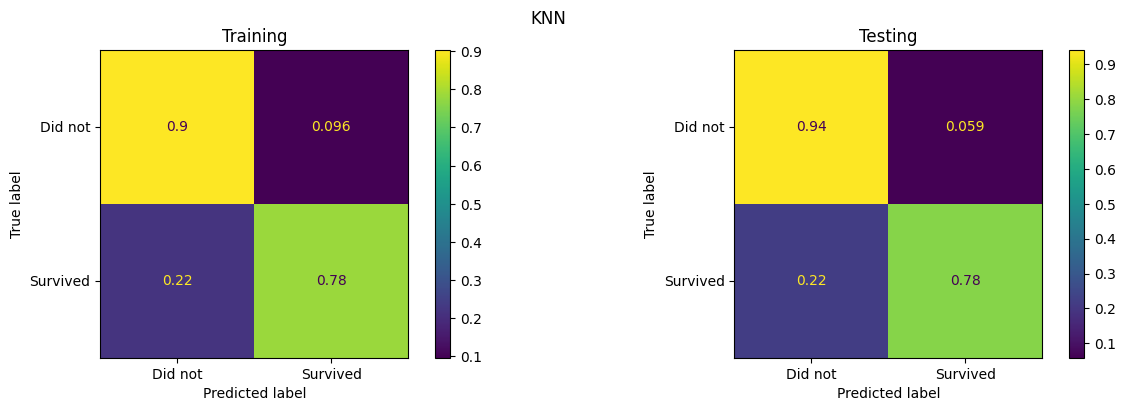

In [67]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_knn_train = knn_clf.predict(Xs_train)
y_knn_test = knn_clf.predict(Xs_test)

fig, ax = plt.subplots(1,2, figsize = (15,4))
ConfusionMatrixDisplay.from_predictions(ys_train, y_knn_train,
                                        normalize = 'true', 
                                        display_labels = ['Did not', 'Survived'],
                                       ax = ax[0])
ConfusionMatrixDisplay.from_predictions(ys_test, y_knn_test, 
                                         normalize = 'true',
                                         display_labels = ['Did not', 'Survived'],
                                         ax = ax[1])
ax[0].set_title('Training')
ax[1].set_title('Testing')
fig.suptitle('KNN')
plt.show()

In [93]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth = 5)
tree_clf.fit(Xs_train, ys_train)

DecisionTreeClassifier(max_depth=5)

In [94]:
y_tree_train = tree_clf.predict(Xs_train)
y_tree_test = tree_clf.predict(Xs_test)

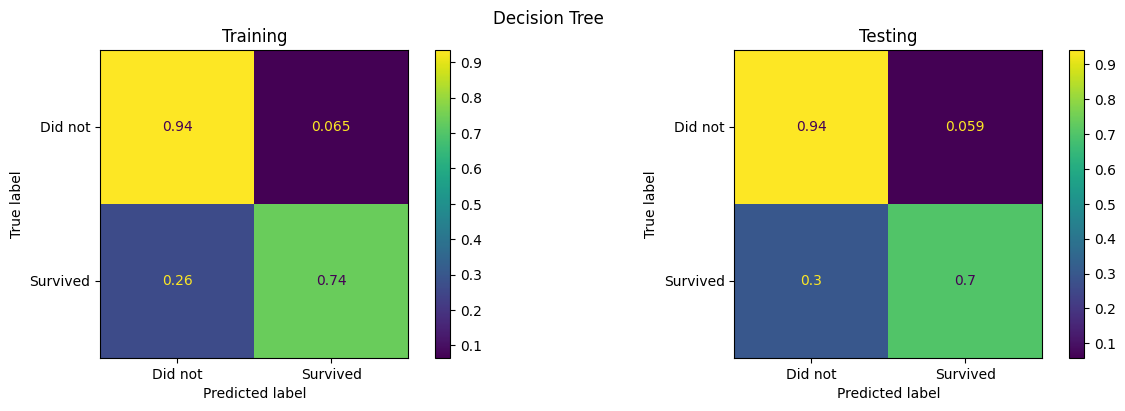

In [95]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
fig, ax = plt.subplots(1,2, figsize = (15,4))
ConfusionMatrixDisplay.from_predictions(ys_train, y_tree_train, 
                                         normalize = 'true',
                                         display_labels = ['Did not', 'Survived'],
                                         ax = ax[0])
ConfusionMatrixDisplay.from_predictions(ys_test, y_tree_test, 
                                         normalize = 'true',
                                         display_labels = ['Did not', 'Survived'],
                                         ax = ax[1])

ax[0].set_title('Training')
ax[1].set_title('Testing')
fig.suptitle('Decision Tree')

plt.show()

#### **Questions**

How does the model performance on the test data compare to the performance on the training data? 
 
 - For Decision Tree, the model performance on the test data is slightly lower than on the training data. In the training set,the model correctly predicted "Did not survive" 94% of the time and "Survived" 74% of the time whereas in the test set,the model correctly predicted "Did not survive" 94% of the time but only 70% for "Survived".
   
 - For KNN, in training set, the model correctly predicted "Did not survive" 90% of the time and "Survived" 78% of the time whereas in testing set,t he model correctly predicted "Did not survive" 94% of the time, but the misclassification for "Did not survive" increased slightly to 5.9%. The "Survived" predictions are consistent, with 78% accuracy. Hence, testing data performed better here.


Which models did you fit and which worked better?
 
 - I fit both KNN and Decision Tree model. The KNN model performed better than the Decision Tree, as it showed similar performance between the training and testing sets. The Decision Tree's performance, especially for the "Survived" class, significantly dropped on the test set whereas KNN's performance remained the same.